In [9]:
import pandas as pd
df = pd.read_csv('D:\\FF\\data\\routeScoreFinal.csv',names=['s1','s2','score','dist'])
print(df.shape)
print(df.head())
dfp = pd.read_csv('D:\\FF\\data\\teF.csv')
print(dfp.shape)
print(dfp.head())
new_df = pd.merge(dfp, df,  how='left', left_on=['s1','s2'], right_on = ['s1','s2'])
print(new_df.shape)
print(new_df.head(20))

(843, 4)
    s1   s2  score  dist
0  538  537    0.0   125
1  137  136    0.0   213
2  260  259    0.0   200
3  623  532    0.0   125
4  558  222    0.0   100
(237973, 8)
   s1  s2     distc     pearc     speac        te  direction   timestamp
0   6   5  0.245330  0.754670  0.808405  0.127175          1  01/01/2017
1   6   5  0.086547  0.913453  0.939917  0.107228          2  02/01/2017
2   6   5  0.037344  0.962656  0.963367  0.104841          2  03/01/2017
3   6   5  0.041158  0.958842  0.955418  0.000000          0  04/01/2017
4   6   5  0.037523  0.962477  0.962141  0.097281          2  05/01/2017
(237973, 10)
    s1  s2     distc     pearc     speac        te  direction   timestamp  \
0    6   5  0.245330  0.754670  0.808405  0.127175          1  01/01/2017   
1    6   5  0.086547  0.913453  0.939917  0.107228          2  02/01/2017   
2    6   5  0.037344  0.962656  0.963367  0.104841          2  03/01/2017   
3    6   5  0.041158  0.958842  0.955418  0.000000          0  04/01/2

In [11]:
df = pd.read_csv('D:\\FF\\data\\teF.csv')
#df.sort_values(by=['timestamp'],ascending=True)
df['uindex']=df['s1'].astype(str)+"_"+df['s2'].astype(str)
#str(df['s1'])#+'-'+str(df['s2'])
print(df.shape)
df['timestamp'] = pd.to_datetime(df['timestamp'],format="%d/%m/%Y")
df['timestamp'] = [time.date() for time in df['timestamp']]
tdf = df[df['uindex']=='125_98']
idx = pd.DatetimeIndex(tdf.timestamp)
series = pd.Series(tdf.direction.values,index=idx)

print(series.head())

(237973, 9)
timestamp
2017-01-01    2
2017-01-02    1
2017-01-03    1
2017-01-04    1
2017-01-05    0
dtype: int64


In [12]:
uvalues = df['uindex'].unique().tolist()

In [13]:
ff = pd.DataFrame({'uindex':[],'timestamp':[],'direction':[]})
for row in uvalues:
    #print(row)
    tdf = df[df['uindex']==row]
    idx = pd.DatetimeIndex(tdf.timestamp)
    series = pd.Series(tdf.direction.values,index=idx)
    a=series.resample('D').mean()
    a = a.reset_index(name='direction')
    ndf = pd.DataFrame(data=a)
    ndf['uindex']=row
    ff=ff.append(ndf)
print(ff.tail())

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


     direction  timestamp   uindex
344        2.0 2017-12-27  670_249
345        0.0 2017-12-28  670_249
346        0.0 2017-12-29  670_249
347        2.0 2017-12-30  670_249
348        2.0 2017-12-31  670_249


In [77]:
p = ff.pivot_table(index='uindex',columns='timestamp',values='direction',fill_value=-1)
p.iloc[0:1,0:5]

timestamp,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00
uindex,,,,,
102_57,1,1,1,1,1


In [116]:
print(p.iloc[13:14].index)
p.iloc[13:14,0:].values

Index(['118_116'], dtype='object', name='uindex')


array([[ 1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  2,  1,  1,
         1,  1,  1,  0,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  2,  0,  1,  1,  1,  1,  2,  0,  2,
         1,  1,  1,  2,  2,  1,  1,  0,  1, -1, -1,  1,  0,  1,  0,  1,
         0,  2,  2,  2,  2,  0,  2,  0,  2,  1,  1,  2,  1,  1,  0,  2,
         0,  2,  1,  1,  2,  2,  2,  2,  1,  2,  2,  0,  2,  2,  1,  2,
         0,  1,  1,  1,  1,  2,  2,  0,  1,  0,  2,  1,  2,  0,  2,  1,
         1,  1,  1,  1,  1,  2,  0,  2,  2,  0,  0,  2,  2,  1,  2,  1,
         2,  2, -1, -1, -1, -1,  2,  2,  2,  2,  2,  0,  1,  1,  0,  0,
         2,  0,  0,  1,  1,  0,  1,  0,  2,  1,  1,  1,  0,  1,  1,  2,
         0,  0,  2,  2,  1,  0,  2,  2,  2,  1,  1,  2,  2,  1,  2,  2,
         2,  2,  2,  1,  2,  2,  1,  1,  1,  2,  2,  2,  2,  0,  1,  1,
         1,  2,  2,  2,  0,  2,  0,  2,  0,  0,  2,  1,  1,  0, 

1


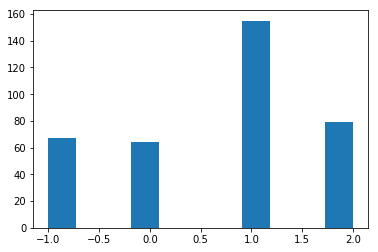

In [119]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x = p.iloc[0:3,0:].values
print(s.mode(x[0]))

_ = plt.hist(x[0], bins='auto')

In [219]:
import statistics as s
from collections import Counter
count=0
for i in range(0,832):
    try:
        x = p.iloc[i:i+1,0:].values
        m = s.mode(x[0])
        if m==-1:
            count=count+1
            print(p.iloc[i:i+1].index.values[0])
    except:
        #print(p.iloc[i:i+1].index.values[0])
        print("")
print(count)

106_11
106_2
106_84
131_108
175_174
178_176
192_191
194_193
197_191
198_195
199_192
199_193
199_195
199_196
199_197
203_195
204_195

207_191
207_192
212_103
212_109
212_134
242_241
267_192
267_193
267_195
267_196
267_197
267_200
267_205
267_207
270_117
282_119
286_76
300_212
304_106
304_111
304_125
305_242
307_242
313_2


348_237
357_270
428_268
436_435
444_163
453_234
453_235
453_237
453_346
453_347
472_193
472_197
472_200
472_206
472_470
472_471
473_472
475_191
475_193
475_195
475_196
475_197
475_200
475_205
475_207
475_472
475_473
475_474
476_195
476_205

477_476
497_304
536_242
546_9
558_221
574_9
576_195
576_472
577_297
577_298
577_529
583_2
591_229
597_29
608_492
622_353
622_412
62_12
62_7
656_242
656_307
92


In [217]:
import collections as c
nlst = []

dirTest='D:\\FF\\data\\'

for i in range(0,832):
    nlstm = []
    x = p.iloc[i:i+1,0:].values
    l = len(x[0])
    mone = (c.Counter((x[0]))[-1]*100)/l
    zero = (c.Counter((x[0]))[0]*100)/l
    one = (c.Counter((x[0]))[1]*100)/l
    two = (c.Counter((x[0]))[2]*100)/l
    nlstm.append([mone,zero,one,two])
    r = nlstm[0].index(max(nlstm[0]))
    trend=1
    for j in (0,3):
        if nlstm[0][r]-nlstm[0][j] < 10 and r!=j:
            trend = 0
            r =-1
    nlst.append([p.iloc[i:i+1].index.values[0],mone,zero,one,two,trend,r])
    #print(nlst)
ndf = pd.DataFrame(nlst)
ndf.to_csv(dirTest+'dirPerc.csv')

In [212]:
nlstm = []
x = p.iloc[83:84,0:].values
l = len(x[0])
mone = (c.Counter((x[0]))[-1]*100)/l
zero = (c.Counter((x[0]))[0]*100)/l
one = (c.Counter((x[0]))[1]*100)/l
two = (c.Counter((x[0]))[2]*100)/l
nlstm.append([mone,zero,one,two])
r =   nlstm[0].index(max(nlstm[0]))
print(r)
for j in (0,3):
    if nlstm[0][r]-nlstm[0][j] < 10 and r!=j:
        print(nlstm[0][r],nlstm[0][j])

2
52.602739726027394 44.10958904109589


In [188]:
print(nlst[0].index(max(nlst[0])))

3


In [12]:
import pandas as pd
df = pd.read_csv('/Users/casa/2019/FF/routeScoreFinal2.csv',index_col='location')
print(df.index[0])
df.columns

475_195


Index(['score', 'dist'], dtype='object')

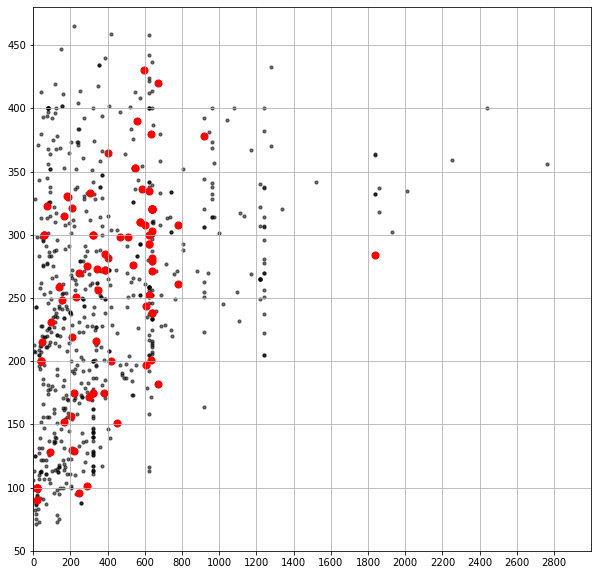

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
plt.scatter(df['score'],df['dist'],facecolors='black',alpha=.55, s=10)
plt.scatter(df[df.index.isin(df1.index)]['score'],df[df.index.isin(df1.index)]['dist'], color="red",s=50)
#plt.scatter(df[df.index.isin(df2.index)]['dist'], df[df.index.isin(df2.index)]['score'], color="blue",s=50)
plt.axis([0,3000,50,480])
plt.xticks(np.arange(0, 3000, step=200))
plt.yticks(np.arange(50, 480, step=50))
axes = plt.gca()
axes.grid()
plt.show()

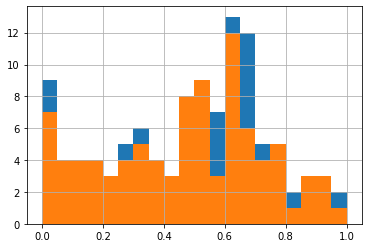

In [23]:
dfone = df[df.index.isin(df1.index)]['dist']
dftwo = df[df.index.isin(df2.index)]['dist']
dfmax =  max(df['dist'])
dfmin =  min(df['dist'])
df1max =  max(dfone)
df1min =  min(dfone)
df2max =  max(dftwo)
df2min =  min(dftwo)
a = (df['dist']-dfmin) / (dfmax - dfmin)

b = (dfone-df1min) / (df1max - df1min)
c = (dftwo-df2min) / (df2max - df2min)
#hist = a.hist(bins=20)
hist = b.hist(bins=20)
hist = c.hist(bins=20)
#hist = df[df.index.isin(df2.index)]['dist'].hist(bins=20)
#hist = df[df.index.isin(df1.index)]['dist'].hist(bins=20)

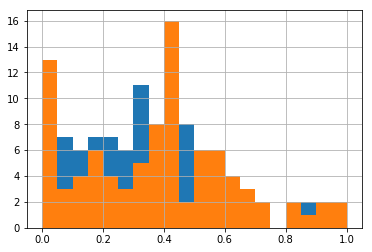

In [44]:
dfone = df[df.index.isin(df1.index)]['score']
dftwo = df[df.index.isin(df2.index)]['score']
dfmax =  max(df['score'])
dfmin =  min(df['score'])
df1max =  max(dfone)
df1min =  min(dfone)
df2max =  max(dftwo)
df2min =  min(dftwo)
a = (df['score']-dfmin) / (dfmax - dfmin)

b = (dfone-df1min) / (df1max - df1min)
c = (dftwo-df2min) / (df2max - df2min)
#hist = a.hist(bins=20)
hist = b.hist(bins=20)
hist = c.hist(bins=20)
#hist = df[df.index.isin(df2.index)]['dist'].hist(bins=20)
#hist = df[df.index.isin(df1.index)]['dist'].hist(bins=20)

0.17696267294951326
0.31514682113746223
0.3801116142881354


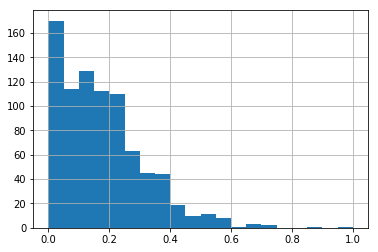

In [45]:
import numpy as np
hist = a.hist(bins=20)
print(np.mean(a))
print(np.mean(b))
print(np.mean(c))

In [20]:
df1 = pd.read_csv('/Users/casa/2019/FF/nodirection.csv',index_col='location')
df2 = pd.read_csv('/Users/casa/2019/FF/noTE.csv',index_col='location')

In [277]:
print(df1.shape)
print(df2.shape)

(93, 4)
(92, 1)


In [305]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit_predict(df)

In [303]:
kmeans

array([2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 4, 0, 5, 1, 0, 2, 0, 4, 5, 0,
       0, 0, 4, 0, 1, 0, 2, 4, 1, 4, 1, 4, 1, 1, 1, 0, 5, 3, 2, 4, 4, 4,
       2, 2, 2, 4, 0, 0, 2, 5, 0, 0, 0, 2, 2, 3, 1, 2, 0, 0, 2, 2, 0, 1,
       2, 4, 4, 0, 0, 2, 4, 0, 4, 0, 2, 0, 0, 4, 0, 2, 0, 4, 4, 2, 2, 5,
       2, 2, 1, 0, 0, 1, 4, 4, 2, 1, 4, 0, 2, 2, 5, 2, 1, 1, 0, 4, 2, 0,
       0, 0, 1, 0, 2, 0, 1, 5, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 0, 2, 0, 2,
       4, 1, 3, 2, 4, 0, 4, 4, 2, 2, 2, 4, 2, 0, 2, 0, 0, 0, 0, 0, 4, 4,
       0, 5, 0, 4, 2, 3, 4, 4, 4, 4, 0, 0, 1, 4, 2, 1, 0, 0, 1, 0, 4, 0,
       4, 0, 1, 1, 0, 0, 0, 0, 4, 5, 2, 1, 5, 0, 0, 2, 0, 4, 0, 2, 4, 0,
       0, 0, 4, 4, 1, 0, 4, 2, 1, 4, 2, 4, 4, 4, 0, 4, 2, 0, 4, 0, 2, 2,
       1, 2, 1, 1, 5, 0, 0, 4, 3, 1, 4, 1, 2, 0, 2, 4, 1, 2, 1, 1, 2, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 1, 1, 4, 2, 5, 4, 0, 2, 0,
       5, 2, 2, 1, 4, 0, 0, 4, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 4, 4, 4,
       0, 1, 2, 2, 4, 0, 2, 2, 0, 0, 0, 4, 2, 0, 2,